In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex

sns.set_style('whitegrid')

from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import f1_score

# **<span style="color:	#0000FF;">1. Memproses dan memahami dataset</span>**

In [2]:
df = pd.read_csv("C:/Work/Data Science/My portofolio/Credit Risk Modellin/german_credit_data.csv")
df.head(20)

Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0            0   67    male    2     own             NaN           little   
1            1   22  female    2     own          little         moderate   
2            2   49    male    1     own          little              NaN   
3            3   45    male    2    free          little           little   
4            4   53    male    2    free          little           little   
5            5   35    male    1    free             NaN              NaN   
6            6   53    male    2     own      quite rich              NaN   
7            7   35    male    3    rent          little         moderate   
8            8   61    male    1     own            rich              NaN   
9            9   28    male    3     own          little         moderate   
10          10   25  female    2    rent          little         moderate   
11          11   24  female    2    rent          little           little   
12          12   22  female    2     own          little         moderate   
13          13   60    male    1     own          little           little   
14          14   28  female    2    rent          little           little   
15          15   32  female    1     own        moderate           little   
16          16   53    male    2     own             NaN              NaN   
17          17   25    male    2     own             NaN           little   
18          18   44  female    3    free          little         moderate   
19          19   31    male    2     own      quite rich              NaN   

    Credit amount  Duration              Purpose  Risk  
0            1169         6             radio/TV  good  
1            5951        48             radio/TV   bad  
2            2096        12            education  good  
3            7882        42  furniture/equipment  good  
4            4870        24                  car   bad  
5            9055        36            education  good  
6            2835        24  furniture/equipment  good  
7            6948        36                  car  good  
8            3059        12             radio/TV  good  
9            5234        30                  car   bad  
10           1295        12                  car   bad  
11           4308        48             business   bad  
12           1567        12             radio/TV  good  
13           1199        24                  car   bad  
14           1403        15                  car  good  
15           1282        24             radio/TV   bad  
16           2424        24             radio/TV  good  
17           8072        30             business  good  
18          12579        24                  car   bad  
19           3430        24             radio/TV  good

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


Ada banyak "Missing Values" di Kolom "Saving Accounts" dan "Checking accounts".

In [4]:
display(Markdown("#### Explore the Values of Text Columns:"))
cols = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']
for col in cols:
    line = "**" + col + ":** "
    for v in df[col].unique():
        line = line + str(v) + ", "
    display(Markdown(line))

#### Explore the Values of Text Columns:

**Sex:** male, female, 

**Housing:** own, free, rent, 

**Saving accounts:** nan, little, quite rich, rich, moderate, 

**Checking account:** little, moderate, nan, rich, 

**Purpose:** radio/TV, education, furniture/equipment, car, business, domestic appliances, repairs, vacation/others, 

**Risk:** good, bad, 

Dari eksplorasi di atas:
- Kolom "Perumahan", "Rekening Tabungan" dan "Rekening Giro" adalah data **Ordinal**.
- Kolom "Seks", "Tujuan" dan "Risiko" adalah data **Kategoris**.

Diketahui dari Konten di halaman kumpulan data, kolom "Pekerjaan" adalah data **Ordinal** yang:
- 0 - tidak terampil dan bukan penduduk,
- 1 - tidak terampil dan penduduk,
- 2 - terampil,
- 3 - sangat terampil

JADI, terapkan logika penyimpanan ke kolom **Ordinal** lainnya "Perumahan", "Rekening tabungan" dan "Rekening giro".

Untuk "Rekening tabungan" dan "Rekening giro":
- 0 - nilai yang hilang, sebagai UNKNOWN
- 1 - kecil
- 2 - sedang
- 3 - cukup kaya
- 4 - kaya

Untuk "Perumahan":
- 0 - gratis
- 1 - sewa
- 2 - milik sendiri

In [5]:
# beri label pada encode kualitas akun dan isi NaN dengan 0
def SC_LabelEncoder(text):
    if text == "little":
        return 1
    elif text == "moderate":
        return 2
    elif text == "quite rich":
        return 3
    elif text == "rich":
        return 4
    else:
        return 0

df["Saving accounts"] = df["Saving accounts"].apply(SC_LabelEncoder)
df["Checking account"] = df["Checking account"].apply(SC_LabelEncoder)

In [6]:
# beri label pada encode kualitas akun dan isi NaN dengan 0
def H_LabelEncoder(text):
    if text == "free":
        return 0
    elif text == "rent":
        return 1
    elif text == "own":
        return 2

df["Housing"] = df["Housing"].apply(H_LabelEncoder)

# **<span style="color:	#0000FF;">2. Exploratory Data Analysis</span>**

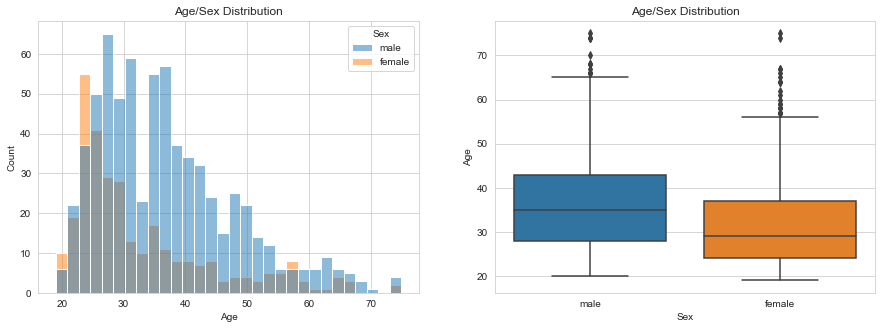

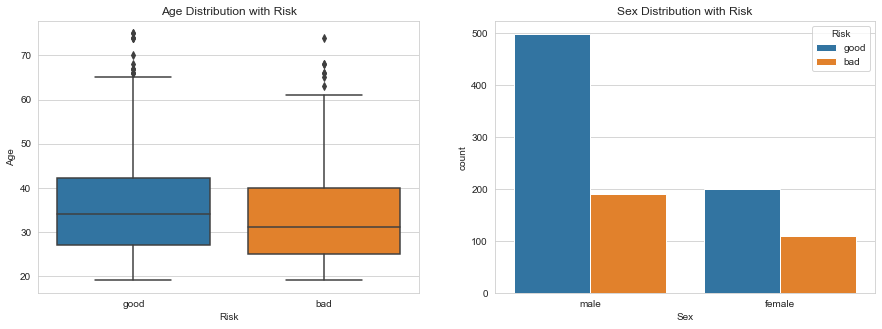

In [7]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.histplot(df, x='Age', bins=30, hue="Sex", ax=ax[0]).set_title("Age/Sex Distribution");
sns.boxplot(data=df, x="Sex", y="Age", ax=ax[1]).set_title("Age/Sex Distribution");

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(data=df, x='Risk', y='Age', ax=ax[0]).set_title("Age Distribution with Risk");
sns.countplot(data=df, x="Sex", hue="Risk", ax=ax[1]).set_title("Sex Distribution with Risk");

**Analisis:**
- Usia tidak banyak mempengaruhi peringkat risiko.
- Pria mengambil lebih banyak kredit dari Bank.
- Laki-laki memiliki persentase peringkat buruk yang lebih rendah daripada wanita.

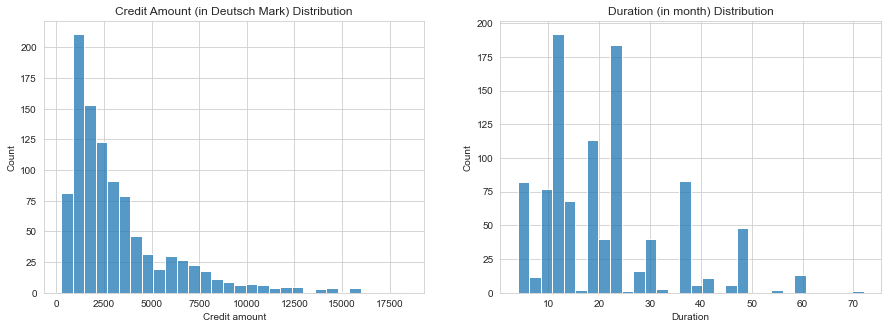

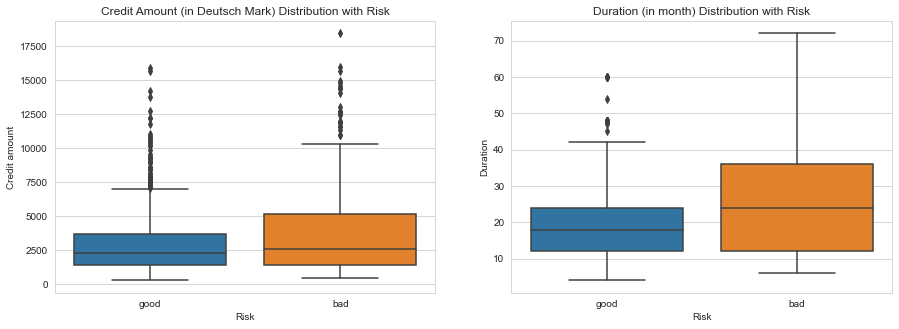

In [8]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.histplot(df, x='Credit amount', bins=30, ax=ax[0]).set_title("Credit Amount (in Deutsch Mark) Distribution");
sns.histplot(df, x='Duration', bins=30, ax=ax[1]).set_title("Duration (in month) Distribution");

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(data=df, x='Risk', y='Credit amount', ax=ax[0]).set_title("Credit Amount (in Deutsch Mark) Distribution with Risk");
sns.boxplot(data=df, x='Risk', y='Duration', ax=ax[1]).set_title("Duration (in month) Distribution with Risk");

**Analisis:** Jumlah kredit yang lebih tinggi dan durasi yang lebih lama berarti risiko yang lebih tinggi bagi bank.

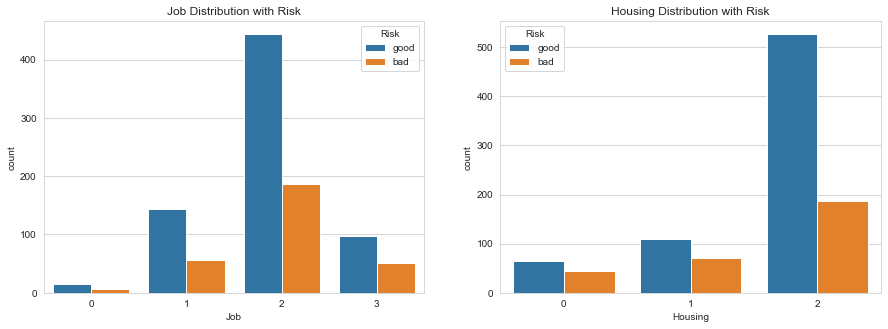

In [9]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=df, x="Job", hue="Risk", ax=ax[0]).set_title("Job Distribution with Risk");
sns.countplot(data=df, x="Housing", hue="Risk", ax=ax[1]).set_title("Housing Distribution with Risk");

**Analisis:**
- Sebagian besar orang dalam catatan memiliki tingkat keterampilan pekerjaan 2, tetapi tingkat keterampilan pekerjaan tidak banyak mempengaruhi peringkat risiko.
- Orang yang memiliki rumah berarti risiko rendah dan peringkat yang baik untuk bank.

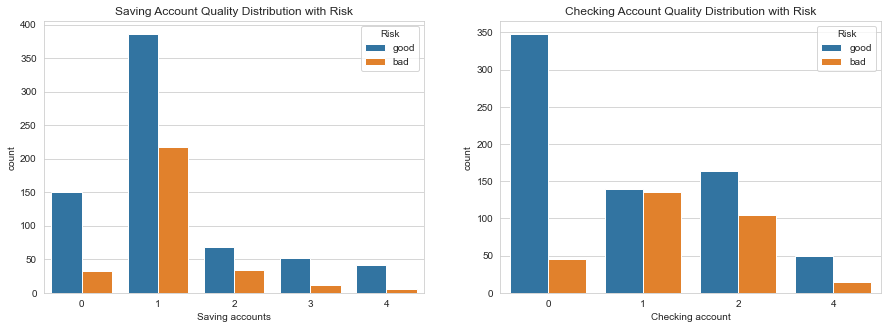

In [10]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=df, x="Saving accounts", hue="Risk", ax=ax[0]).set_title("Saving Account Quality Distribution with Risk");
sns.countplot(data=df, x="Checking account", hue="Risk", ax=ax[1]).set_title("Checking Account Quality Distribution with Risk");

**Analisis** (karena 0 berarti tidak diketahui, yang dibahas hanya tingkat kualitas 1 hingga 4):
- Orang yang menabung lebih banyak berarti lebih sedikit risiko bagi bank, tetapi kebanyakan orang dalam catatan memiliki sedikit tabungan (tidak kaya!)
- Sekitar setengah dari orang-orang yang memiliki sedikit rekening giro dianggap memiliki peringkat risiko yang buruk.
- Sekitar 20% orang yang memiliki rekening giro moderat dianggap memiliki peringkat risiko yang buruk.

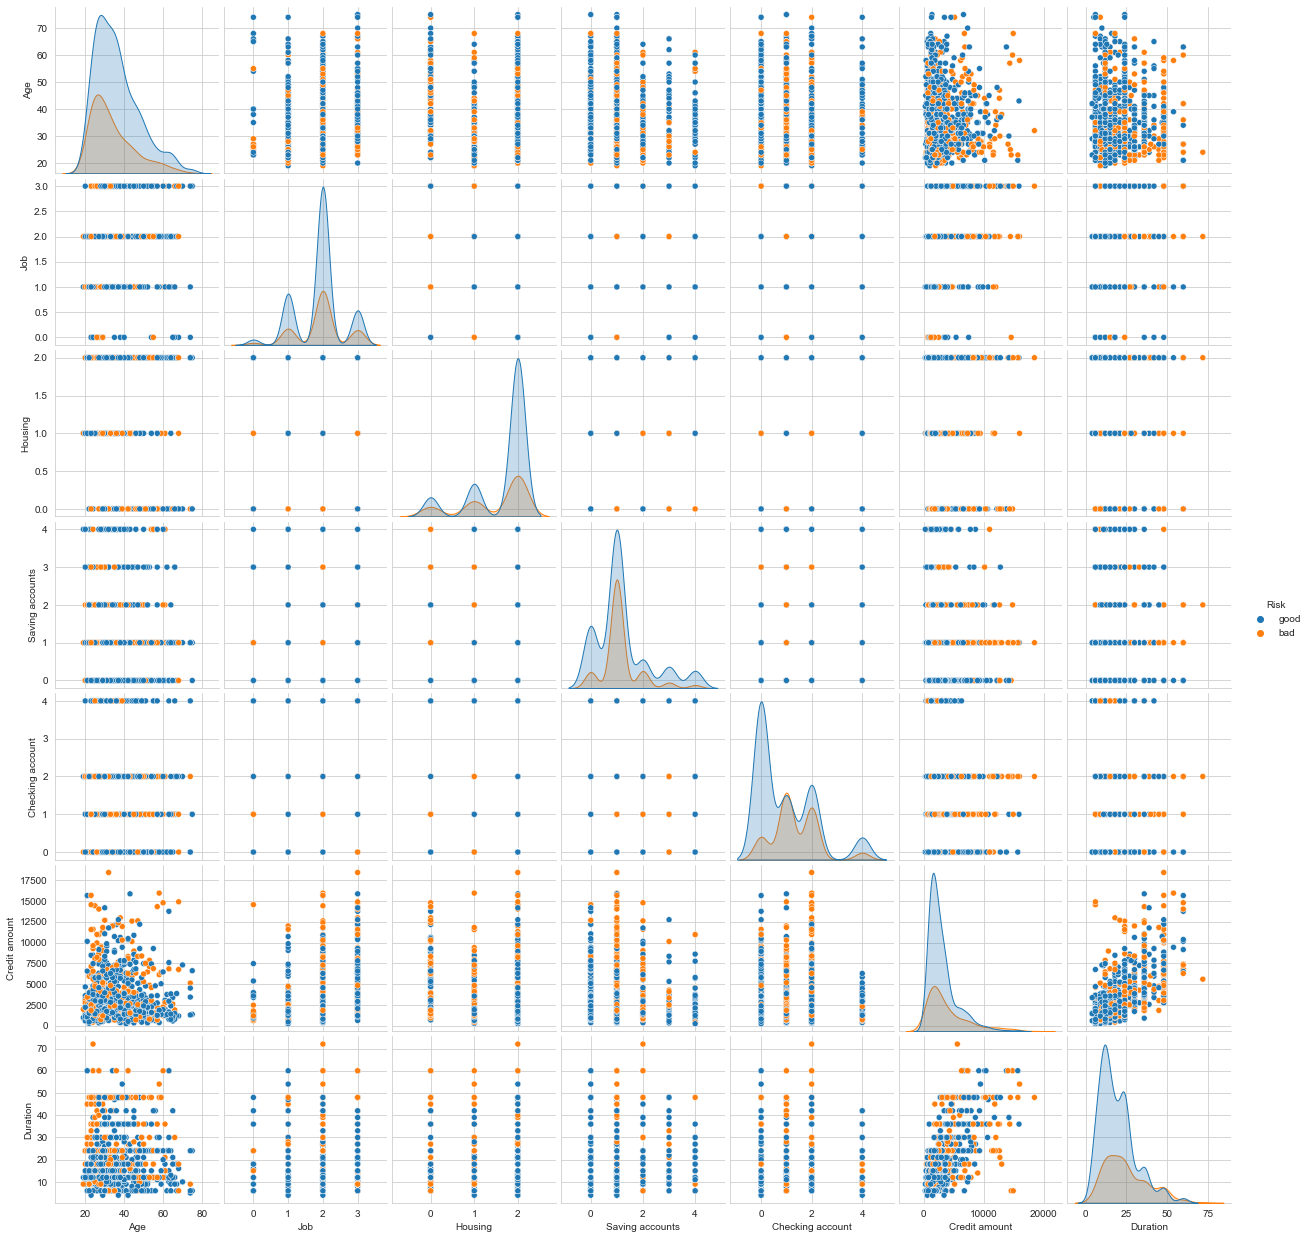

In [11]:
sns.pairplot(df[['Age', 'Job', 'Housing', 'Saving accounts', 
                 'Checking account', 'Credit amount', 'Duration', "Risk"]], hue="Risk");

C:\Users\User\AppData\Local\Temp\ipykernel_14148\2753039494.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr,linewidths=.5, annot=True, cmap="YlGnBu",mask=np.triu(np.ones_like(corr, dtype=np.bool)))\


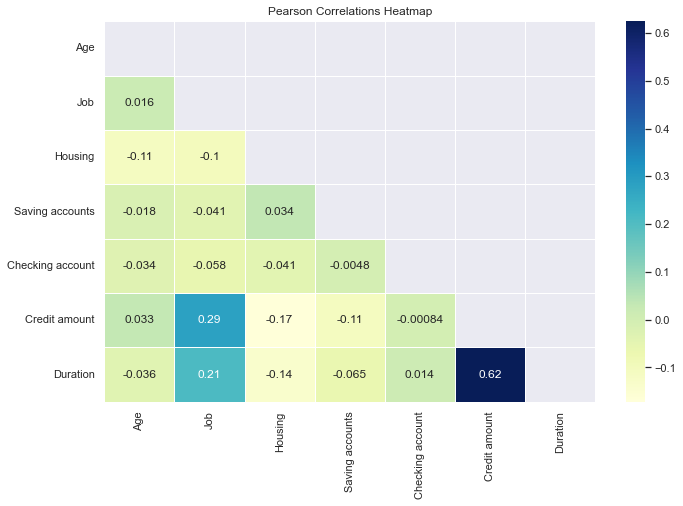

In [12]:
corr = df[['Age', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration']].corr()
sns.set(rc={'figure.figsize':(11,7)})
sns.heatmap(corr,linewidths=.5, annot=True, cmap="YlGnBu",mask=np.triu(np.ones_like(corr, dtype=np.bool)))\
    .set_title("Pearson Correlations Heatmap");

**Analisis:** Jumlah Kredit SANGAT dan POSITIF terkait dengan Durasi.

# **<span style="color:	#0000FF;">4. Pra-pemrosesan data untuk Kolom-kolom kategori diskret</span>**

In [13]:
# gunakan LabelEncoder() untuk mengkodekan kolom kategoris lainnya:
for col in ["Sex", "Purpose", "Risk"]:
    le = LabelEncoder()
    le.fit(df[col])
    df[col] = le.transform(df[col])
df.head()

Unnamed: 0  Age  Sex  Job  Housing  Saving accounts  Checking account  \
0           0   67    1    2        2                0                 1   
1           1   22    0    2        2                1                 2   
2           2   49    1    1        2                1                 0   
3           3   45    1    2        0                1                 1   
4           4   53    1    2        0                1                 1   

   Credit amount  Duration  Purpose  Risk  
0           1169         6        5     1  
1           5951        48        5     0  
2           2096        12        3     1  
3           7882        42        4     1  
4           4870        24        1     0

# **<span style="color:	#0000FF;">5. Klustering</span>**

In [14]:
cdf = df.drop("Risk", axis=1)

**<span style="color:	#0000FF;">5.1 Menemukan angka terbaik untuk K-Means dan Analisis</span>**

Dimulai dengan mengaplikasikan Metode Elbow

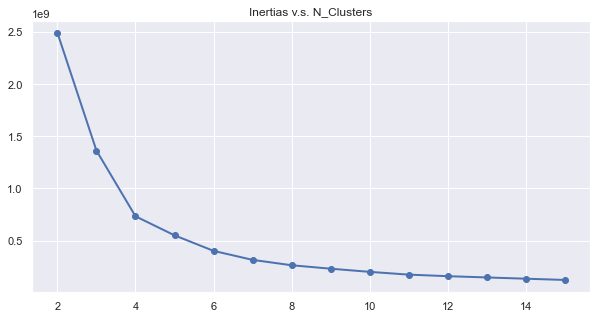

In [15]:
inertias = []

for i in range(2,16):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(cdf)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.title('Inertias v.s. N_Clusters')
plt.plot(np.arange(2,16),inertias, marker='o', lw=2);

**Analisis :**"Elbow" pada chart diatas berada pada 4. Jumlah cluster maka harus berjumlah 4.

In [16]:
km = KMeans(n_clusters=4, random_state=0)
clusters = km.fit_predict(cdf)

C:\Users\User\AppData\Local\Temp\ipykernel_14148\3681320248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustered["Cluster"] = clusters


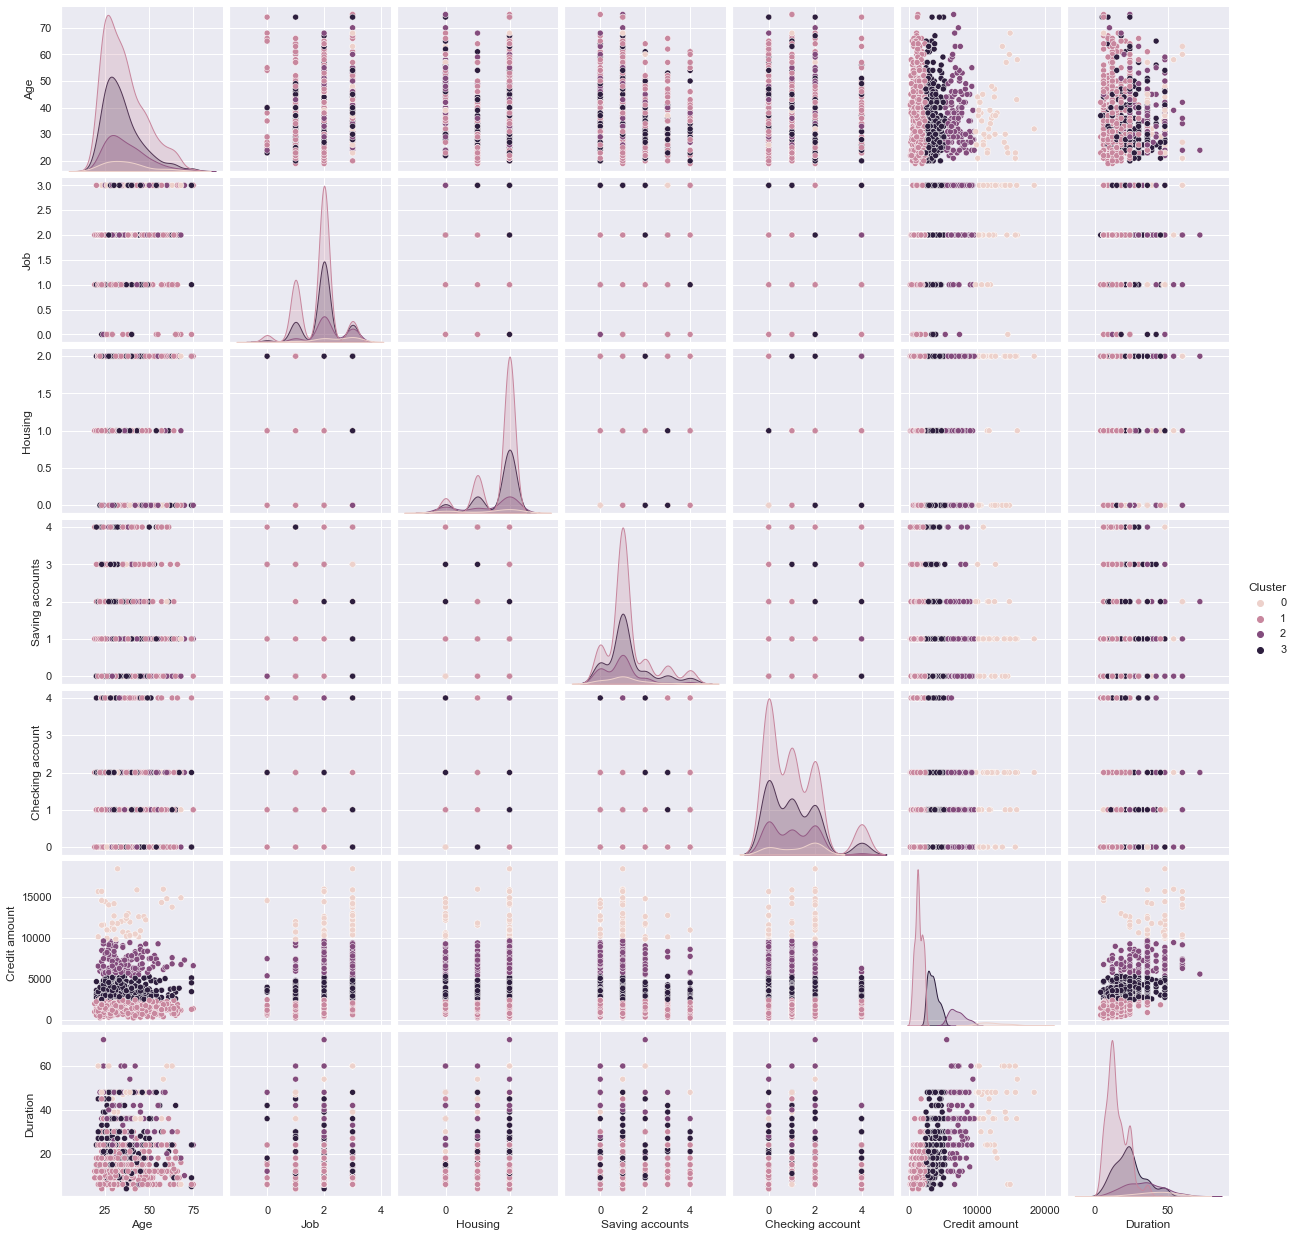

In [17]:
df_clustered = cdf[['Age', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration']]
df_clustered["Cluster"] = clusters
sns.pairplot(df_clustered[['Age', 'Job', 'Housing', 'Saving accounts', 
                 'Checking account', 'Credit amount', 'Duration', "Cluster"]], hue="Cluster");

**Analisis :** Bandingkan Nilai pada EDA (Exploratory Data Analysis). Plot Matrix cluster 4 ini Menunjukkan Batas Grouping yang lebih jelas daripada rating Risiko Baik/buruk yang telah diberikan

**<span style="color:#0000FF;">5.2 Kluster data menjadi 2 grup dan bandingkan dengan rating risiko baik/buruk yang diberikan</span>**

Gunakan K-means untuk mengkluster orang pada data menjadi 2 grup dan cek jika hasilnya dekat ke 2 grup risiko yang diberikan

In [18]:
km = KMeans(n_clusters=2, random_state=0)
clusters = km.fit_predict(cdf)

In [19]:
display(Markdown("In encoded Risk column, good = 1 and bad = 0, but the predicted clusters 0 and 1 does not have the same meaning. Thus, whether the predicted clusters is equal or opposite to the given risk, the higher TRUE percentage will be the accuracy rate."))
acc = max((sum(clusters == df["Risk"]) / len(df)), (sum(clusters != df["Risk"]) / len(df)))
display(Markdown("The accuracy rate of 2-Means clustering is " + str(acc)))

In encoded Risk column, good = 1 and bad = 0, but the predicted clusters 0 and 1 does not have the same meaning. Thus, whether the predicted clusters is equal or opposite to the given risk, the higher TRUE percentage will be the accuracy rate.

The accuracy rate of 2-Means clustering is 0.671

# **<span style="color:	#0000FF;">6. Memprediksi Risiko</span>**

Berdasar pada Kolom resiko yang telah diberikan

In [20]:
X, y = df.drop("Risk", axis=1), df["Risk"]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=0)

**<span style="color:	#0000FF;">6.1 Klasifikasi K-Nearest Neighbors</span>**

In [21]:
max_score = 0
max_k = 0
for k in range(1, 100):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train,y_train)
    score = f1_score(y_test, neigh.predict(X_test))
    if score > max_score:
        max_k = k
        max_score = score

display(Markdown("If use K-Nearest Neighbors Classification, the k should be " + str(max_k) + " to get best prediction, and then the  mean accuracy is " + str(max_score)))

If use K-Nearest Neighbors Classification, the k should be 69 to get best prediction, and then the  mean accuracy is 0.8352941176470587

**<span style="color:	#0000FF;">6.2 Klasifikasi dengan Model yang lain</span>**

Semenjak Klasifikasi KKN (K-Nearest Neighbors) menghabiskan banyak waktu dan memori untuk memprediksi, pada seksi ini akan dicoba model lain untuk membandingkan proses dan hasilnya.

**<span style="color:	#0000FF;">Pemilihan Model dengan Validasi Silang</span>**

In [22]:
# menentukan model
Models = {
    "SVC": SVC(),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "GaussianNaiveBayes": GaussianNB()
}

In [23]:
cv_results = pd.DataFrame(columns=['model', 'train_score', 'test_score'])
for key in Models.keys():
    cv_res = model_selection.cross_validate(Models[key], X_train, y_train, 
                                             return_train_score=True,
                                             scoring="f1",
                                             cv=5, n_jobs=-1)
    res = {
        'model': key, 
        'train_score': cv_res["train_score"].mean(), 
        'test_score': cv_res["test_score"].mean(),
        'fit_time': cv_res["fit_time"].mean(),
        'score_time': cv_res["score_time"].mean(),
        }
    cv_results = cv_results.append(res, ignore_index=True)
    print("CV for model:", key, "done.")
cv_results

C:\Users\User\AppData\Local\Temp\ipykernel_14148\1142883325.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cv_results = cv_results.append(res, ignore_index=True)


CV for model: SVC done.


C:\Users\User\AppData\Local\Temp\ipykernel_14148\1142883325.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cv_results = cv_results.append(res, ignore_index=True)


CV for model: DecisionTree done.
CV for model: RandomForest done.
CV for model: GaussianNaiveBayes done.


C:\Users\User\AppData\Local\Temp\ipykernel_14148\1142883325.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cv_results = cv_results.append(res, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_14148\1142883325.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cv_results = cv_results.append(res, ignore_index=True)


model train_score test_score  fit_time  score_time
0                 SVC     0.82589   0.826072  0.096198    0.056408
1        DecisionTree         1.0    0.74731  0.054393    0.008412
2        RandomForest         1.0   0.824136  0.721204    0.073394
3  GaussianNaiveBayes    0.812295   0.810961  0.009598    0.010205

#### Evaluasi Model pada Set Pengujian
- Random Forest Classifier memberikan hasil yang baik pada train_score dan test_score.
- SVC dan Gaussian Naive Bayes menunjukkan sedikit over-fitting.
- Gaussian Naive Bayes Classifier memiliki runtime paling sedikit.
- Random Forest Classifier akan memberi tahu pentingnya fitur, sementara SVC hanya mengembalikan coef_ dalam kasus kernel linier, yang akan terlalu lambat.

**Dengan mempertimbangkan semua ini, Random Forest Classifier dipilih untuk dievaluasi pada set pengujian:**

In [24]:
rf = Models["RandomForest"].fit(X_train, y_train)
print('f1_score:', f1_score(y_test, rf.predict(X_test)))

f1_score: 0.8389261744966443


**<span style="color:	#0000FF;">Diskusi pentingnya fitur</span>**

In [25]:
feature_importance = pd.DataFrame()
feature_importance["feature"] = X_train.columns
feature_importance["importance"] = rf.feature_importances_
feature_importance = feature_importance.sort_values("importance", ascending=False)
feature_importance

feature  importance
7     Credit amount    0.204979
0        Unnamed: 0    0.166787
1               Age    0.139149
8          Duration    0.135780
6  Checking account    0.127614
9           Purpose    0.072957
5   Saving accounts    0.054568
3               Job    0.042579
4           Housing    0.033121
2               Sex    0.022467